In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
orgData=pd.read_csv(r"Aditya- Organization field-report-11-07-2024.csv")
orgData.head(5)

,Name,Email,Created,Onboarding Percentage,StagesHistory New Date Time,StagesHistory Onboarding Date Time,StagesHistory Launched Date Time,Reference By,Referral Name,Platform,Lead Source,CSM,Status
0,Apricot Solar,apricotsolar@subcontractorhub.com,25-04-2022 09:15,0.0,NaN,NaN,NaN,NaN,NaN,Sales Enablement,NaN,NaN,Not Interested
1,Semper Solaris,shaiban+semper@expansionjs.com,01-06-2022 13:07,0.0,NaN,NaN,NaN,NaN,Justin Brach,Sales Enablement,Referral,NaN,Follow Up
2,Barron Contracting,josh@barroncontracting.com,27-07-2022 11:21,0.0,NaN,NaN,NaN,NaN,NaN,Sales Enablement,NaN,NaN,Dormant
3,SubcontractorHub Demo,garima+sub@expansionjs.com,28-07-2022 12:26,75.0,NaN,18-07-2024 16:43,NaN,NaN,NaN,Sales Enablement,NaN,NaN,Demo
4,SolarQuote,shaiban@solarquote.com,22-09-2022 11:15,100.0,NaN,NaN,NaN,NaN,NaN,Sales Enablement,NaN,Eric Roberts(eroberts+admin@solarquote.com),Launched


In [3]:
print(orgData.shape)

(958, 13)


In [4]:
orgData.isna().sum()

Name                                    0
Email                                   0
Created                                 0
Onboarding Percentage                   0
StagesHistory New Date Time           445
StagesHistory Onboarding Date Time    616
StagesHistory Launched Date Time      743
Reference By                          705
Referral Name                         747
Platform                                0
Lead Source                           350
CSM                                   647
Status                                  0
dtype: int64

Stage history columns,Referral,Rference and CSM columns have >600 missing records so getting rid of all of them.

In [9]:
#columns to be removed from the data
deletion=["StagesHistory New Date Time","StagesHistory Onboarding Date Time","StagesHistory Launched Date Time","Reference By","Referral Name","CSM "]

In [10]:
adjusted_org = orgData.drop(columns=[col for col in deletion if col in orgData.columns])
adjusted_org.shape

(958, 8)

Enocding the stats column for better analysis

In [13]:
import pandas as pd
import json
from sklearn.preprocessing import LabelEncoder



# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the status column
adjusted_org['status_encoded'] = label_encoder.fit_transform(adjusted_org['Status'])

# Create a dictionary to track encoding mappings
status_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# Convert numpy int64 values to Python int
status_mapping_serializable = {k: int(v) for k, v in status_mapping.items()}


print("\nStatus Encoding Mapping:")
print(status_mapping)

with open("status_mapping.json", "w") as json_file:
    json.dump(status_mapping_serializable, json_file)

print("Status mapping saved as JSON.")



Status Encoding Mapping:
{'Approved': np.int64(0), 'Cancelled': np.int64(1), 'Demo': np.int64(2), 'Dormant': np.int64(3), 'Follow Up': np.int64(4), 'Launched': np.int64(5), 'Negotiation': np.int64(6), 'New': np.int64(7), 'Not Interested': np.int64(8), 'Onboarding': np.int64(9), 'Pending Approval': np.int64(10), 'Ready To Launch': np.int64(11), 'Retention': np.int64(12), 'Training': np.int64(13), 'Unqualified': np.int64(14), 'Won': np.int64(15)}
Status mapping saved as JSON.


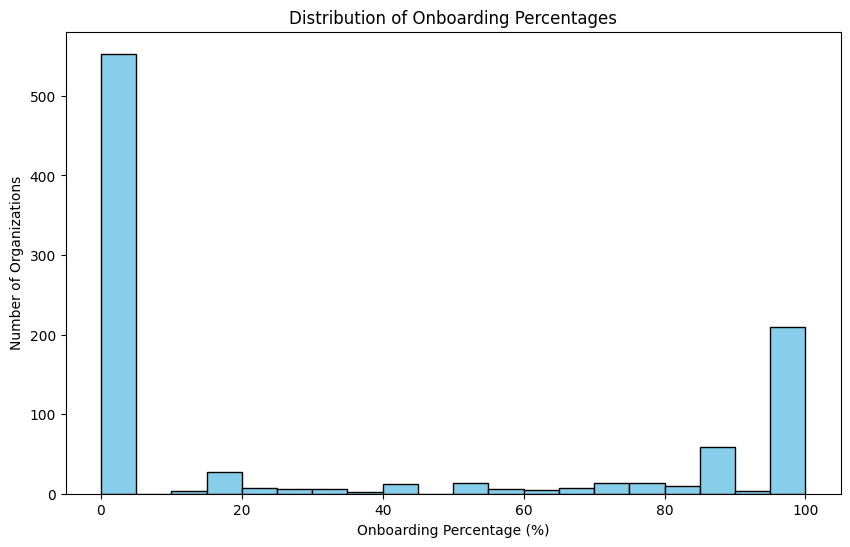

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(adjusted_org['Onboarding Percentage'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Onboarding Percentage (%)")
plt.ylabel("Number of Organizations")
plt.title("Distribution of Onboarding Percentages")
plt.show()


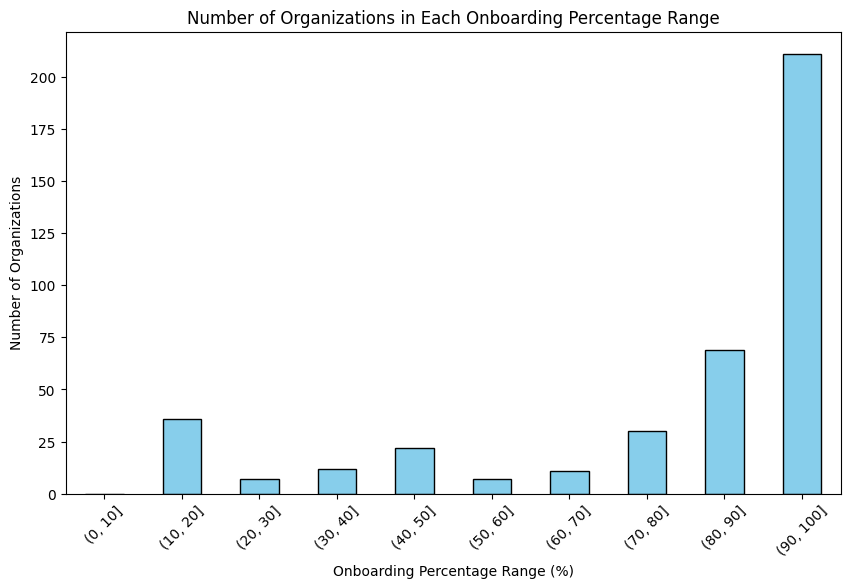

In [17]:
# Create bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
adjusted_org['percentage_range'] = pd.cut(adjusted_org['Onboarding Percentage'], bins=bins)
range_counts = adjusted_org['percentage_range'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
range_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Onboarding Percentage Range (%)")
plt.ylabel("Number of Organizations")
plt.title("Number of Organizations in Each Onboarding Percentage Range")
plt.xticks(rotation=45)
plt.show()


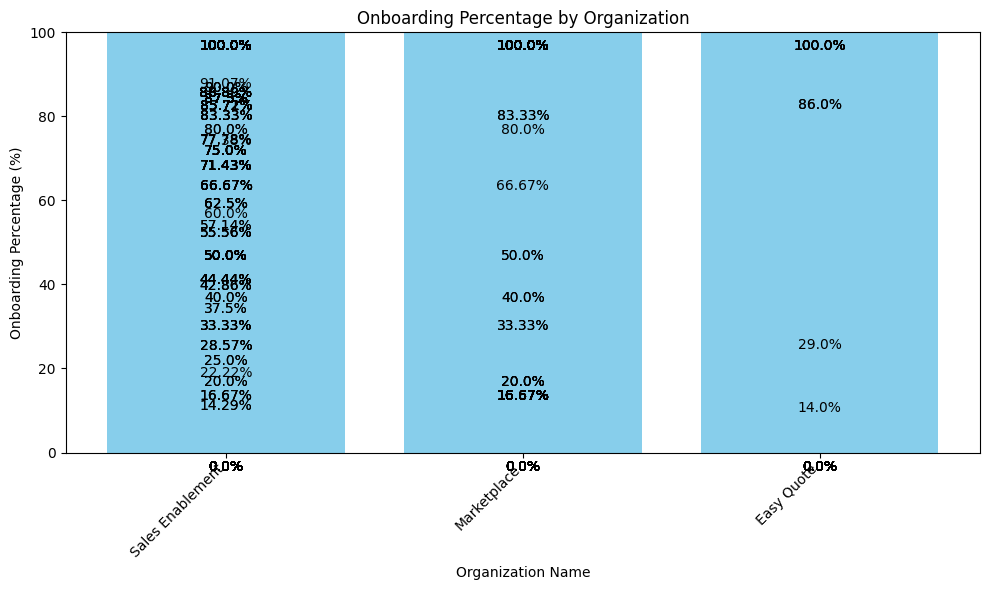

In [21]:
plt.figure(figsize=(10, 6))
bars = plt.bar(adjusted_org['Platform'], adjusted_org['Onboarding Percentage'], color='skyblue')

# Adding percentage labels on top of each bar
for bar, percentage in zip(bars, adjusted_org['Onboarding Percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5,
             f'{percentage}%', ha='center', va='bottom', color='black', fontsize=10)

# Add labels and title
plt.xlabel("Organization Name")
plt.ylabel("Onboarding Percentage (%)")
plt.title("Onboarding Percentage by Organization")
plt.ylim(0, 100)  # Assuming percentage is between 0 and 100

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

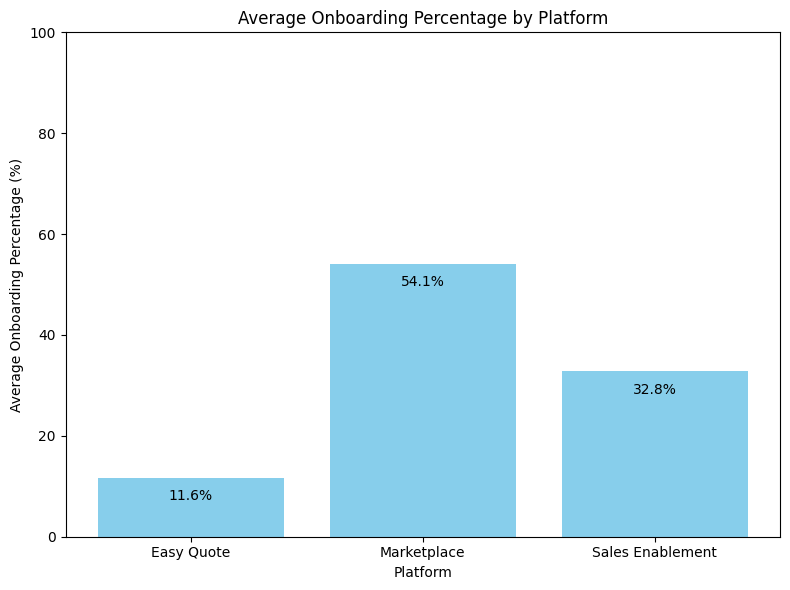

In [22]:


# Group by 'platform' and calculate the mean onboarding percentage
platform_aggregated = adjusted_org.groupby('Platform')['Onboarding Percentage'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(platform_aggregated['Platform'], platform_aggregated['Onboarding Percentage'], color='skyblue')

# Add percentage labels on top of each bar
for bar, percentage in zip(bars, platform_aggregated['Onboarding Percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5,
             f'{percentage:.1f}%', ha='center', va='bottom', color='black', fontsize=10)

# Add labels and title
plt.xlabel("Platform")
plt.ylabel("Average Onboarding Percentage (%)")
plt.title("Average Onboarding Percentage by Platform")
plt.ylim(0, 100)  # Assuming percentage is between 0 and 100

# Show plot
plt.tight_layout()
plt.show()


In [24]:
adjusted_org['Lead Source'] = adjusted_org['Lead Source'].fillna('Unknown')
print(adjusted_org['Lead Source'].unique())

['Unknown' 'Referral' 'Conference' 'LinkedIn' 'Partnership' 'Website'
 'Subcontractorhub' 'Demand Gen' 'Marketing' 'Webinar']


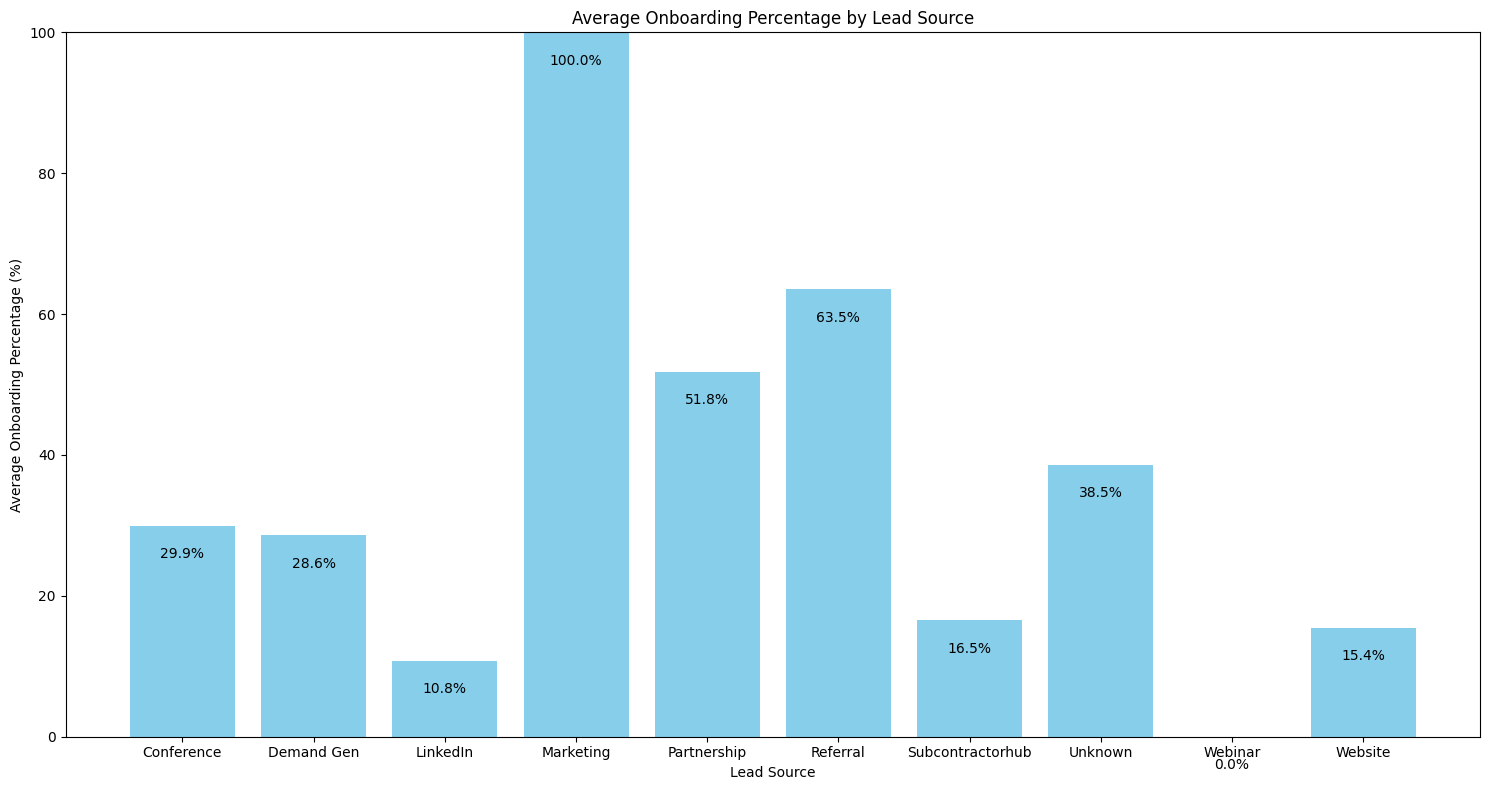

In [28]:

# Group by 'Lead' and calculate the mean onboarding percentage
platform_aggregated = adjusted_org.groupby('Lead Source')['Onboarding Percentage'].mean().reset_index()

# Plotting
plt.figure(figsize=(15, 8))
bars = plt.bar(platform_aggregated['Lead Source'], platform_aggregated['Onboarding Percentage'], color='skyblue')

# Add percentage labels on top of each bar
for bar, percentage in zip(bars, platform_aggregated['Onboarding Percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5,
             f'{percentage:.1f}%', ha='center', va='bottom', color='black', fontsize=10)

# Add labels and title
plt.xlabel("Lead Source")
plt.ylabel("Average Onboarding Percentage (%)")
plt.title("Average Onboarding Percentage by Lead Source")
plt.ylim(0, 100)  # Assuming percentage is between 0 and 100

# Show plot
plt.tight_layout()
plt.show()

In [19]:
print(adjusted_org.info())
print(adjusted_org.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Name                   958 non-null    object  
 1   Email                  958 non-null    object  
 2   Created                958 non-null    object  
 3   Onboarding Percentage  958 non-null    float64 
 4   Platform               958 non-null    object  
 5   Lead Source            608 non-null    object  
 6   CSM                    311 non-null    object  
 7   Status                 958 non-null    object  
 8   status_encoded         958 non-null    int64   
 9   percentage_range       405 non-null    category
dtypes: category(1), float64(1), int64(1), object(7)
memory usage: 68.9+ KB
None
Name                       0
Email                      0
Created                    0
Onboarding Percentage      0
Platform                   0
Lead Source              350
CSM 

In [20]:
print(len(orgData['Name'].unique().tolist()))
print(len(orgData['Email'].unique().tolist()))
print(len(orgData['Created'].unique().tolist()))
print(len(orgData['Onboarding Percentage'].unique().tolist()))
print(len(orgData['Reference By'].unique().tolist()))
print(len(orgData['Platform'].unique().tolist()))
stats=orgData['Status'].unique().tolist()


896
914
923
34
6
3


In [8]:
print(len(stats))

16
